# Decision Trees

Decision Trees are a non-parametric supervised machine learning technique for classification and regression. Its aim is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features or input vectors.

<h3>Aim for this tutorial </h3>
1. Hands on implementation of a Decision Tree algorithm <br>
2. Understand and interpret decision trees - for both classification and regression use cases <br>
3. Understand the computational complexity or cost of implementing a tree

<h3>Dataset: Iris </h3>

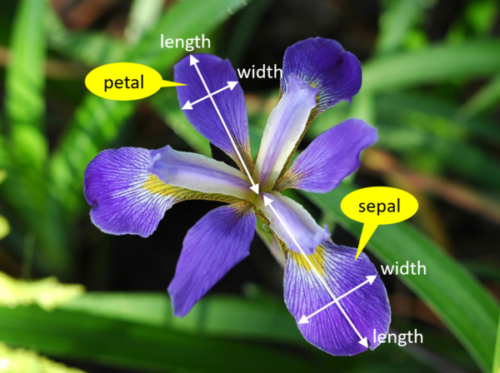

<h3>Classification</h3>

<strong>DecisionTreeClassifier</strong> is a class capable of performing multi-class classification on a dataset - i.e. capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

As with other classifiers, <strong>DecisionTreeClassifier</strong> takes as input two arrays:
1. An array X, sparse or dense, of size <i>[n_samples, n_features]</i> holding the training samples<br>
2. And an array Y of integer values, size <i>[n_samples]</i>, holding the class labels for the training samples

For example:

In [4]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clsf = tree.DecisionTreeClassifier()
clsf = clsf.fit(X, Y)

Now test your trained model on sample dataset:

In [5]:
clsf.predict([[2., 2.]])
# Answer: array([1])

array([1])

You can also predict the probability of each class:

In [6]:
clf.predict_proba([[2., 2.]])
# Answer: array([[0., 1.]])

NameError: name 'clf' is not defined

Now, create a tree using the Iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clsf = tree.DecisionTreeClassifier()
clsf = clsf.fit(X, y)

To visualize your tree:

In [ ]:
# tree.plot_tree(clsf.fit(iris.data, iris.target)) 

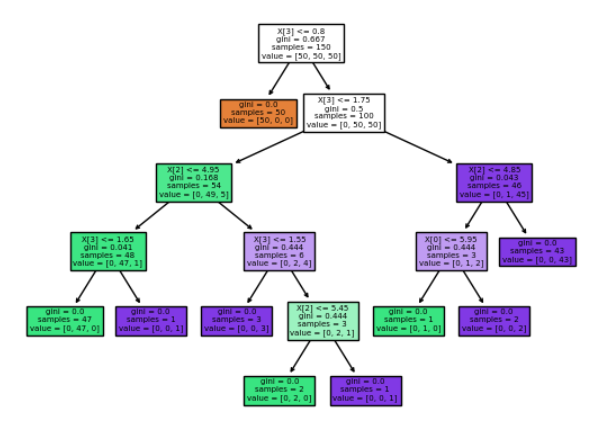

Export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with

<i>conda install python-graphviz</i>

Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with pip install graphviz.

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

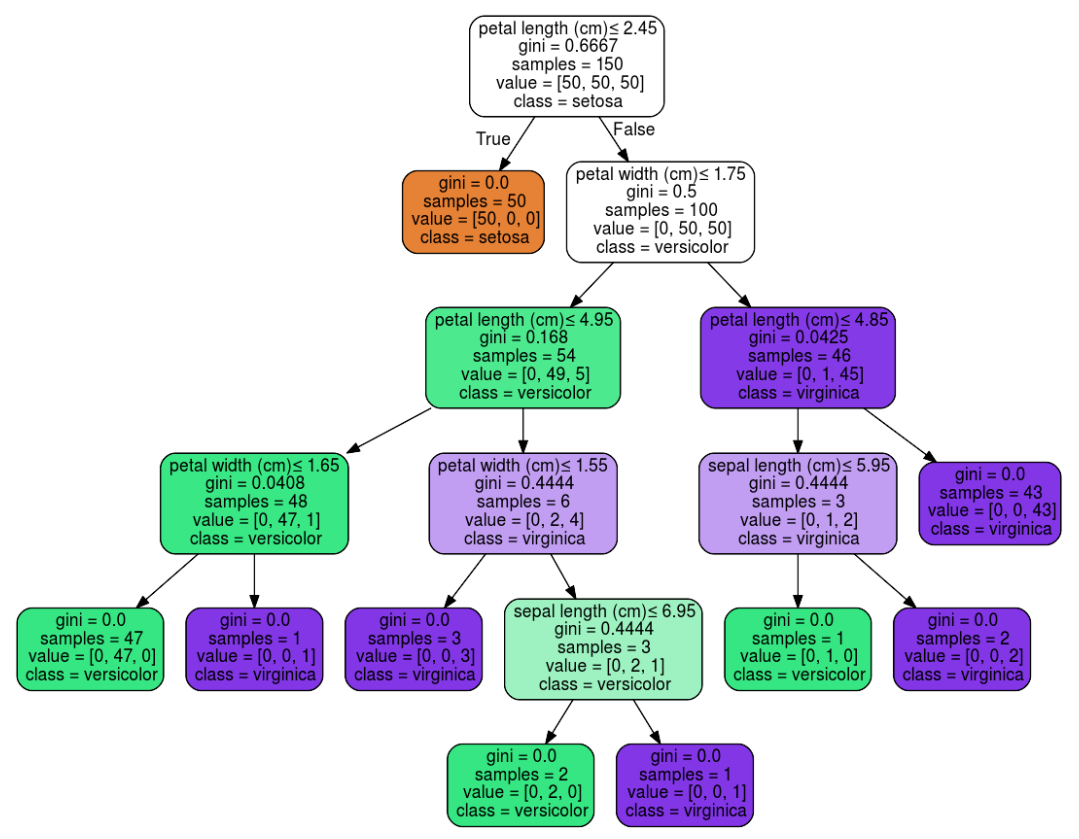

The <strong>export_graphviz </strong> exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

In [ ]:
dot_data = tree.export_graphviz(clsf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

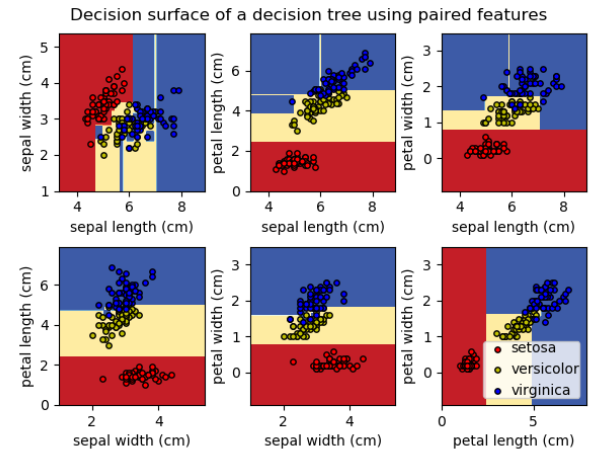

Alternatively, the tree can also be exported in textual format with the function <strong>export_text</strong>. This method doesn’t require the installation of external libraries and is more compact. Here is how it works:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

Answer:<br>
    |--- petal width (cm) <= 0.80 <br>
|   |--- class: 0 <br>
|--- petal width (cm) >  0.80 <br>
|   |--- petal width (cm) <= 1.75 <br>
|   |   |--- class: 1 <br>
|   |--- petal width (cm) >  1.75 <br>
|   |   |--- class: 2

<h3>Regression</h3>

As we have seen with Classification, Decision Trees can also be applied to Regression problems, using <strong>DecisionTreeRegressor</strong> class.

In this case, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values (or categories).

Let's test the <strong>DecisionTreeRegressor</strong>:

In [ ]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clsf = tree.DecisionTreeRegressor()
clsf = clsf.fit(X, y)
clsf.predict([[1, 1]])
# Answer: array([0.5])


1D Regression with Decision Trees

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

Automatically created module for IPython interactive environment


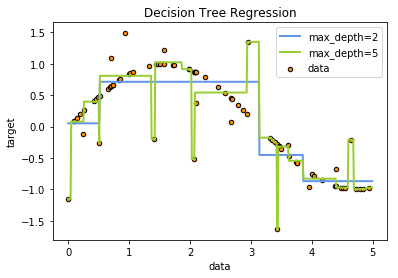

In [8]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<h3>Computational Complexity</h3>

In general, the run time cost to construct a balanced binary tree is 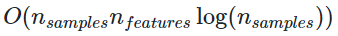

and query time 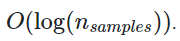

Although the tree construction algorithm attempts to generate balanced trees, they will not always be balanced. Assuming that the subtrees remain approximately balanced, the cost at each node consists of searching through  to find the feature that offers the largest reduction in entropy. This has a cost of  at each node, leading to a total cost over the entire trees (by summing the cost at each node) of 
.

# Next -> Random Forest

